## Imports

In [2]:
from numpy.random import seed
seed(888)
from tensorflow import random
random.set_seed(404)

In [66]:
import os
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import itertools

from keras.datasets import cifar10
from IPython import display
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard
from time import strftime
from sklearn.metrics import confusion_matrix

%matplotlib inline

## Constants

In [4]:
LABEL_NAMES = ["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT*IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
LOG_DIR = "tensorboard_cifar_logs/"

## Get the Data

In [5]:
(x_train_all, y_train_all) , (x_test, y_test) = cifar10.load_data()

## Exploration of Data

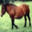

In [6]:
pic = array_to_img(x_train_all[7])
pic

In [7]:
LABEL_NAMES[y_train_all[3][0]]

'Deer'

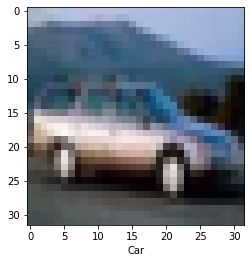

In [8]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]])
plt.show()

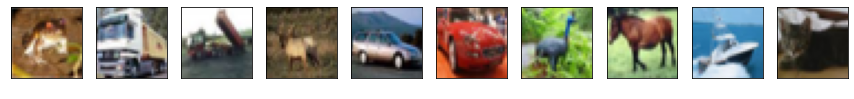

In [9]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], c="white")
    plt.imshow(x_train_all[i])

In [10]:
nr_images, x,y,c = x_train_all.shape
print(f"images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}")

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [11]:
x_test.shape

(10000, 32, 32, 3)

## Preprocess Data

In [12]:
type(x_train_all[0][0][12][0])

numpy.uint8

In [13]:
x_train_all, x_test = x_train_all / 255 , x_test / 255

In [14]:
type(x_train_all[0][0][12][0])

numpy.float64

In [15]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_train_all.shape

(50000, 3072)

In [16]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
x_test.shape

(10000, 3072)

#### Create Calidation Dataset

In [17]:
x_val = x_train_all[:10000]
y_val = y_train_all[:10000]
x_val.shape

(10000, 3072)

In [18]:
x_train = x_train_all[10000:]
y_train = y_train_all[10000:]
x_train.shape

(40000, 3072)

#### Create a small Dataset (demo)

In [19]:
x_train_demo = x_train[:1000]
y_train_demo = y_train[:1000]

## Define the Neural Network

In [20]:
 model_1 = Sequential([
     Dense (units = 128, input_dim=TOTAL_INPUTS, activation="relu", name="m1_hidden1"),
     Dense (units = 64, activation="relu", name="m1_hidden2"),
     Dense (units = 16, activation="relu", name="m1_hidden3"),
     Dense (units = 10, activation="softmax", name="m1_output")
 ])

model_1.compile(
    optimizer= "adam", 
    loss= "sparse_categorical_crossentropy", 
    metrics= ["accuracy"]
 )

In [21]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation= "relu", name="m2_hidden1"))
model_2.add(Dense(64, activation= "relu", name="m2_hidden2"))
model_2.add(Dense(16, activation= "relu", name="m2_hidden3"))
model_2.add(Dense(10, activation= "softmax", name="m2_output"))

model_2.compile(
    optimizer= "adam", 
    loss= "sparse_categorical_crossentropy", 
    metrics= ["accuracy"]
 )

In [22]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation= "relu", name="m3_hidden1"))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation= "relu", name="m3_hidden2"))
model_3.add(Dense(16, activation= "relu", name="m3_hidden3"))
model_3.add(Dense(10, activation= "softmax", name="m3_output"))

model_3.compile(
    optimizer= "adam", 
    loss= "sparse_categorical_crossentropy", 
    metrics= ["accuracy"]
 )

In [23]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


## Tensorboard

In [25]:
def get_tensorboard(model_name):

    folder_name= f"{model_name} at {strftime('%H %M')}"
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("All Done")

    return TensorBoard(log_dir= dir_paths)

## Fit the Models

In [26]:
samples_per_batch = 1000

In [27]:
# nr_epochs = 150
# model_1.fit(x_train_demo, y_train_demo, batch_size=samples_per_batch, epochs = nr_epochs,
#  callbacks=[get_tensorboard("Model 1")], verbose = 0, validation_data=(x_val, y_val))

In [28]:
# nr_epochs = 150
# model_2.fit(x_train_demo, y_train_demo, batch_size=samples_per_batch, epochs = nr_epochs,
#  callbacks=[get_tensorboard("Model 2")], verbose = 0, validation_data=(x_val, y_val))

In [29]:
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs = nr_epochs,
 callbacks=[get_tensorboard("Model 1 Mega")], verbose = 0, validation_data=(x_val, y_val))

All Done
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


In [30]:
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs = nr_epochs,
 callbacks=[get_tensorboard("Model 2 Mega")], verbose = 0, validation_data=(x_val, y_val))

All Done


In [31]:
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs = nr_epochs,
 callbacks=[get_tensorboard("Model 3 Mega")], verbose = 0, validation_data=(x_val, y_val))

All Done


In [32]:
x_val.shape

(10000, 3072)

In [34]:
test = np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [38]:
np.set_printoptions(precision= 3)
model_2.predict(test)

array([[3.172e-02, 8.634e-03, 6.450e-02, 7.838e-02, 2.107e-01, 7.349e-02,
        3.891e-01, 1.410e-01, 2.419e-04, 2.219e-03]], dtype=float32)

In [39]:
model_2.predict(x_val)

array([[3.172e-02, 8.634e-03, 6.450e-02, ..., 1.410e-01, 2.419e-04,
        2.219e-03],
       [2.234e-02, 5.861e-01, 4.154e-03, ..., 4.633e-03, 2.110e-01,
        1.418e-01],
       [3.610e-02, 8.883e-02, 5.762e-03, ..., 2.677e-02, 9.938e-02,
        6.803e-01],
       ...,
       [6.405e-03, 6.687e-01, 4.889e-03, ..., 7.235e-03, 2.564e-02,
        2.710e-01],
       [4.233e-03, 8.295e-01, 4.580e-03, ..., 4.897e-03, 2.822e-02,
        9.564e-02],
       [8.084e-04, 2.770e-04, 7.038e-02, ..., 7.316e-01, 1.654e-04,
        6.353e-04]], dtype=float32)

In [40]:
model_2.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6], dtype=int64)

In [41]:
y_val[0]

array([6], dtype=uint8)

In [45]:
for i in range(10):
    test_image = np.expand_dims(x_val[i], axis = 0)
    predicted_val = model_2.predict_classes(test_image)[0]
    print(f"Actual value{y_val[i][0]} vs predicted: {predicted_val}")

Actual value6 vs predicted: 6
Actual value9 vs predicted: 1
Actual value9 vs predicted: 9
Actual value4 vs predicted: 6
Actual value1 vs predicted: 8
Actual value1 vs predicted: 7
Actual value2 vs predicted: 2
Actual value7 vs predicted: 7
Actual value8 vs predicted: 8
Actual value3 vs predicted: 9


## Evaluation

In [46]:
model_2.metrics_names

['loss', 'accuracy']

In [48]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f"Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}")

313/313 [==============================] - 1s 3ms/step - loss: 1.4545 - accuracy: 0.4834
Test loss is 1.45 and test accuracy is 48.3%


### Confusion

In [52]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix.shape

(10, 10)

In [54]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [67]:
conf_matrix[0]

array([578,  27,  86,  14,  55,  16,  24,  24, 162,  14], dtype=int64)

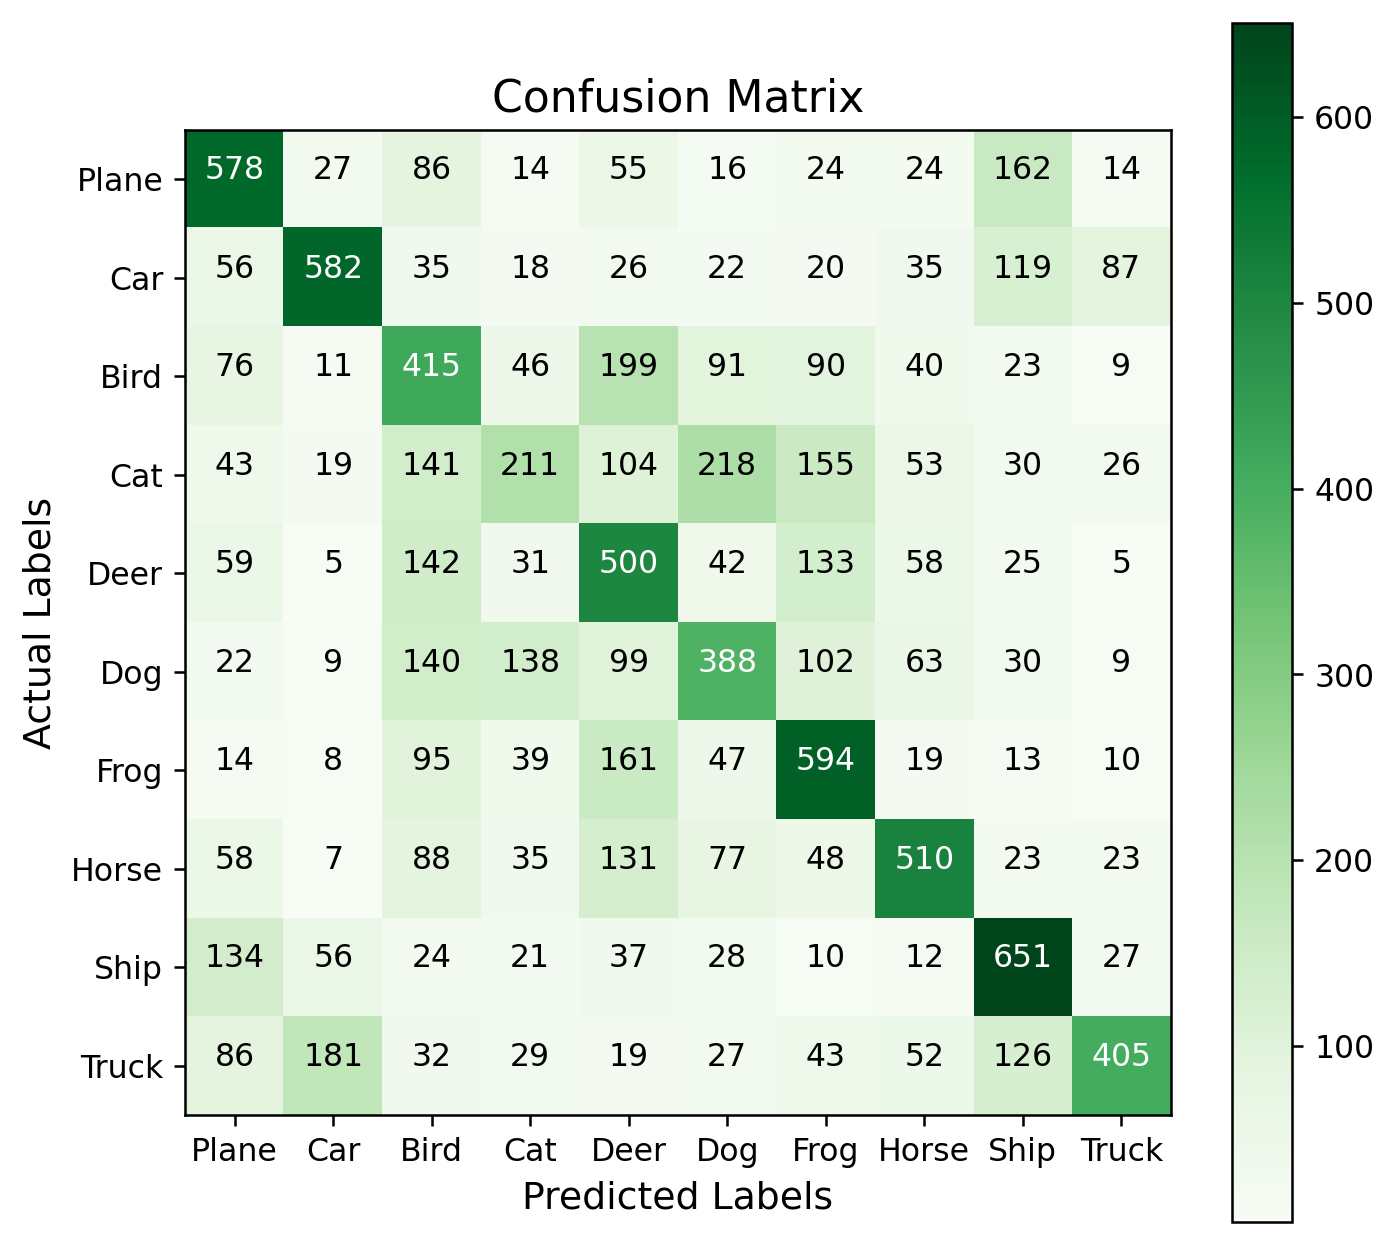

In [78]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap= plt.cm.Greens)

plt.title("Confusion Matrix", fontsize = 14)
plt.ylabel("Actual Labels", fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", 
    color= "white" if conf_matrix[i, j] > conf_matrix.max()/1.8 else "black")


plt.show()

In [79]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
recall

array([0.578, 0.582, 0.415, 0.211, 0.5  , 0.388, 0.594, 0.51 , 0.651,
       0.405])

In [80]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)
precision

array([0.513, 0.643, 0.346, 0.363, 0.376, 0.406, 0.487, 0.589, 0.542,
       0.659])

In [88]:
avg_recall = np.mean(recall)
print(f"Model 2 recall score: {avg_recall:0.2%}")

Model 2 recall score: 48.34%


In [87]:
avg_precision = np.mean(precision)
print(f"Model 2 precision score: {avg_precision:0.2%}")

Model 2 precision score: 49.23%


In [89]:
f1_score = 2* (avg_precision * avg_recall) /(avg_recall + avg_precision)
print(f"Model 2 f-score score: {f1_score:0.2%}")

Model 2 f-score score: 48.78%
